In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("train.csv")
pair_data = pd.read_csv("pairs.csv")

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In this notebook, we make use of more features in the data set apart from just the location distance, name similarity, and category similarity on pairs. The rest of the data is quite sparse with plenty of `N/A` values. We will train some out-of-box models on all features. Note that the current zip-code processing is bad. Python has a package that can compute distances between zip-codes. However, apart from url and phone, zip-code is the next sparsest feature.

First, let's recall the data.

In [5]:
data

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138807,E_ffffb80854f713,青ガエル,35.659020,139.700780,NaN,渋谷区,東京都,150-0043,JP,NaN,NaN,NaN,P_7ccbeab96cd82e
1138808,E_ffffbf9a83e0ba,Deshon Place,40.872116,-79.945343,325 New Castle Rd,Butler,PA,16001,US,NaN,NaN,Housing Developments,P_db0abc418e7365
1138809,E_ffffc572b4d35b,İzmir Adnan Menderes Havaalanı,38.423733,27.142826,NaN,İzmir,NaN,NaN,TR,NaN,NaN,Airport Services,P_ae96252a6a9380
1138810,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,338362989,BBQ Joints,P_146662f246d418


In [6]:
pair_data

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578902,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5,1.368397,103.898145,332 Hougang Ave 5,Singapore,Singapore,530332,SG,NaN,...,103.897452,Hougang ave 5,NaN,NaN,NaN,SG,NaN,NaN,NaN,True
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Fawsley Nr Daventry,Daventry,Northants,NN11 3BA,GB,NaN,...,-1.179698,NaN,NaN,NaN,NaN,GB,NaN,NaN,Gyms or Fitness Centers,False
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com/stores/ll/US/T...,...,-86.723855,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com,+16156799940,Mobile Phone Shops,True
578905,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,...,139.774890,NaN,NaN,NaN,NaN,JP,NaN,NaN,BBQ Joints,True


Here we start by inserting a `distance` column into the `pair_data`, in units of kilometers.

In [7]:
from geopy import distance

In [8]:
pair_data_vectorized = pair_data.copy()

In [9]:
# Takes two lists of the same length, returns a list of pairs
def to_pair(l1, l2):
    return [(l1[i],l2[i]) for i in range(len(l1))]

In [10]:
# Takes two lists of long/lat pairs, returns their geodesic distance
def get_dists(l1, l2):
    return [distance.distance(l1[i], l2[i]).km for i in range(len(l1))]

In [11]:
loc1s = to_pair(pair_data_vectorized['latitude_1'], pair_data_vectorized['longitude_1'])
loc2s = to_pair(pair_data_vectorized['latitude_2'], pair_data_vectorized['longitude_2'])

pair_data_vectorized['distance'] = get_dists(loc1s, loc2s)

In [12]:
pair_data_vectorized

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match,distance
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True,1.046198
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False,0.730228
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True,0.140466
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True,0.015708
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False,0.698792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578902,E_ffff80f94b2fee,Blk 332 Hougang Avenue 5,1.368397,103.898145,332 Hougang Ave 5,Singapore,Singapore,530332,SG,NaN,...,Hougang ave 5,NaN,NaN,NaN,SG,NaN,NaN,NaN,True,0.091260
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Fawsley Nr Daventry,Daventry,Northants,NN11 3BA,GB,NaN,...,NaN,NaN,NaN,NaN,GB,NaN,NaN,Gyms or Fitness Centers,False,0.094236
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com/stores/ll/US/T...,...,825C Murfreesboro Pike,Nashville,TN,37217,US,https://www.cricketwireless.com,+16156799940,Mobile Phone Shops,True,0.864526
578905,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,上野6-13-6,Taitō,東京都,110-0005,JP,NaN,...,NaN,NaN,NaN,NaN,JP,NaN,NaN,BBQ Joints,True,0.034689


Now that we have distances taken care of, we'll move onto the other `string`-based features. Here we just use a simple TfIdf vectorizer supplied by sklearn on each of the features.

In [13]:
features = ['name', 'address', 'city', 'state', 'zip', 'country', 'url', 'phone', 'categories']
Vectorizers = {}

for f in features:
    Vectorizers[f] = TfidfVectorizer()
    Vectorizers[f].fit_transform(data[f].fillna("NaN"))

We run these vectorizers on the `pairs_data` and also compute the cosine-similarity between the corresponding features. For example, we use `Vectorizers['name']` to process `name_1` and `name_2`, the compute the similarity of `name_1` with `name_2` by computing the dot product of the corresponding vectors.

Note that if `name_1` or `name_2` is `NaN`, then we impute the similarity of `name_1` with `name_2` as the average of the other similarities.

In [14]:
# Takes two np arrays of normalized vectors, returns their cosine similarity (ie., dot products)
# f is the feature being checked. Used to search for `NaN` entries
def cosine_similarity(l1, l2, f):
    c_s = [0]*(np.shape(l1)[0])
    
    total = 0
    count = 0
    
    for i in range(np.shape(l1)[0]):
        
        # Just some progress updates
        if i%50000==0:
            print(i/len(pair_data)*100, '% done with current feature.')
        
        # This condition checks that neither entry is `NaN`.
        if ( not pd.isna( pair_data_vectorized[f+'_1'][i] ) ) and ( not pd.isna( pair_data_vectorized[f+'_2'][i] ) ):
            # This is the dot product
            A = l1[i]@l2[i].T
            c_s[i] = A[0,0]
            count = count + 1
            total = total + A[0,0]
            
    return (c_s, total, count) 

In [15]:
# Fills the similarity of NaN values as an average of the computable similarities

def fill_NaNs(cs, total, count, f):
    if len(c_s) == count:
        return cs
    
    avg = total/count
    
    for i in range(len(cs)):
        
        if i%50000==0:
            print(i/len(pair_data)*100, '% done imputing feature.')
            
        if pd.isna(pair_data_vectorized[f+'_1'][i]) or pd.isna(pair_data_vectorized[f+'_2'][i]):
            cs[i] = avg
    
    return cs

In [16]:
for f in features:
    feat_1s = Vectorizers[f].transform(pair_data_vectorized[f+'_1'].fillna('NaN'))
    feat_2s = Vectorizers[f].transform(pair_data_vectorized[f+'_2'].fillna('NaN'))
    
    print('Computing similarity for ', f)
    
    c_s, total, count = cosine_similarity(feat_1s, feat_2s, f)
    
    cos_sim = fill_NaNs(c_s, total, count, f)
    
    pair_data_vectorized[f+' sim'] = cos_sim
    print(f, ' done!')
    print()

Computing similarity for  name
0.0 % done with current feature.
8.636965868438281 % done with current feature.
17.273931736876563 % done with current feature.
25.910897605314844 % done with current feature.
34.547863473753125 % done with current feature.
43.18482934219141 % done with current feature.
51.82179521062969 % done with current feature.
60.45876107906797 % done with current feature.
69.09572694750625 % done with current feature.
77.73269281594453 % done with current feature.
86.36965868438281 % done with current feature.
95.0066245528211 % done with current feature.
name  done!

Computing similarity for  address
0.0 % done with current feature.
8.636965868438281 % done with current feature.
17.273931736876563 % done with current feature.
25.910897605314844 % done with current feature.
34.547863473753125 % done with current feature.
43.18482934219141 % done with current feature.
51.82179521062969 % done with current feature.
60.45876107906797 % done with current feature.
69.09

86.36965868438281 % done imputing feature.
95.0066245528211 % done imputing feature.
phone  done!

Computing similarity for  categories
0.0 % done with current feature.
8.636965868438281 % done with current feature.
17.273931736876563 % done with current feature.
25.910897605314844 % done with current feature.
34.547863473753125 % done with current feature.
43.18482934219141 % done with current feature.
51.82179521062969 % done with current feature.
60.45876107906797 % done with current feature.
69.09572694750625 % done with current feature.
77.73269281594453 % done with current feature.
86.36965868438281 % done with current feature.
95.0066245528211 % done with current feature.
0.0 % done imputing feature.
8.636965868438281 % done imputing feature.
17.273931736876563 % done imputing feature.
25.910897605314844 % done imputing feature.
34.547863473753125 % done imputing feature.
43.18482934219141 % done imputing feature.
51.82179521062969 % done imputing feature.
60.45876107906797 % do

Some histograms of the newly processed data.

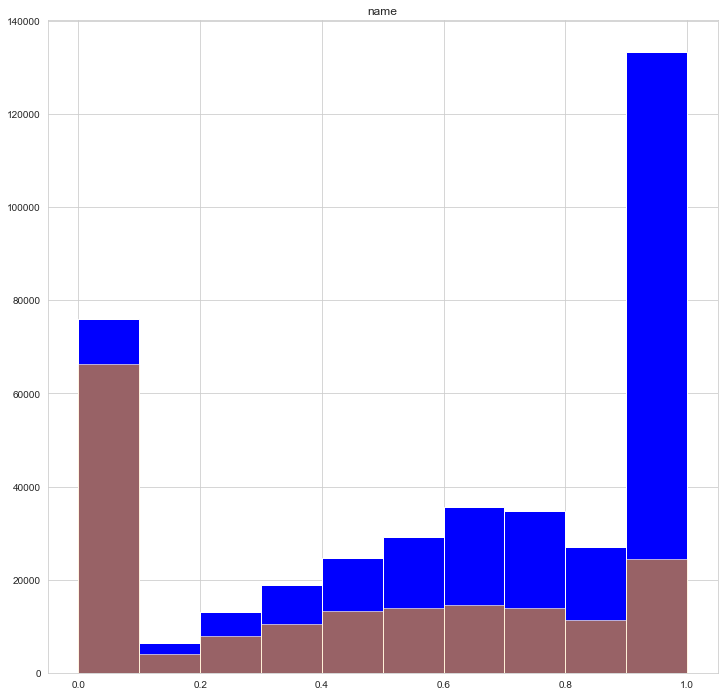

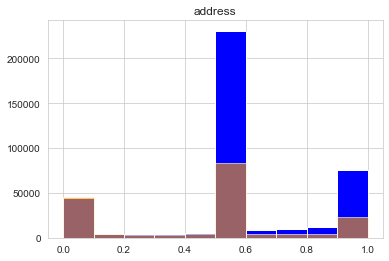

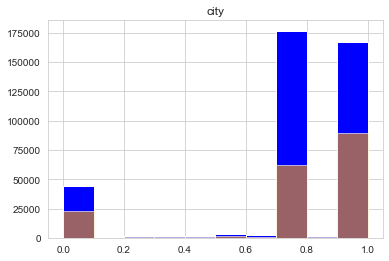

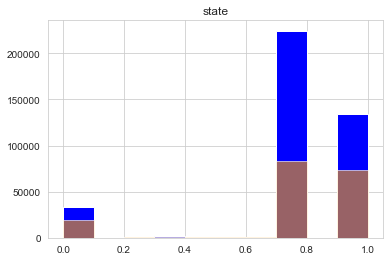

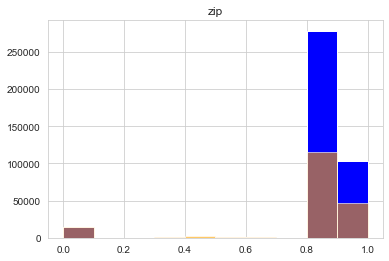

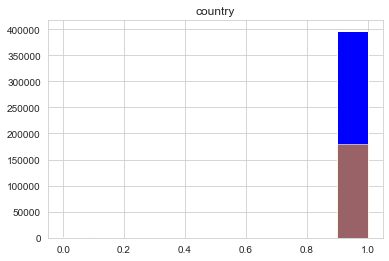

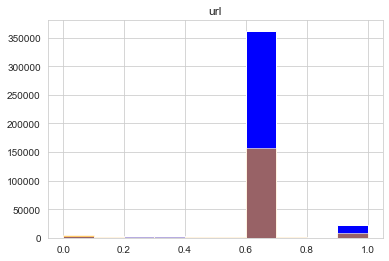

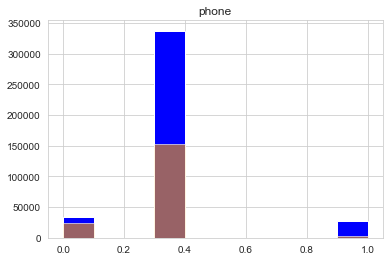

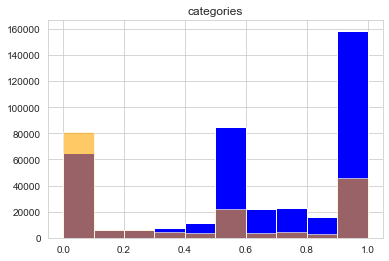

In [17]:
plt.figure(figsize = (12,12))

for f in features:
    
    plt.title(f)
    
    plt.hist(pair_data_vectorized[pair_data_vectorized['match'] == True][f+' sim'],color='blue', label="Match")

    plt.hist(pair_data_vectorized[pair_data_vectorized['match'] == False][f+' sim'], color='orange', alpha=.6, label="Not Match")
    
    plt.show()


Casting `match` as integers, for preference.

In [18]:
# Match = 1, NonMatch = 0
pair_data_vectorized['match'] = pair_data_vectorized['match'].values.astype(int)

Now that we've processed some data, we can make some models, starting with our `train_test_split` on the pairs data.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
pair_train, pair_test = train_test_split(pair_data_vectorized.copy(),
                                         shuffle=True,
                                         random_state=609,
                                         stratify=pair_data_vectorized['match'])

Let's make some KNN models as in the BasicModel notebook. 
----

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

You can look at other models further below, just after the next gray line

-------------

In [23]:
n1 = 1
n2 = 40
threshs = np.arange(0.1, 0.9, 0.05)
accs = np.zeros((n2-n1,len(threshs)))
precs = np.zeros((n2-n1,len(threshs)))
recs = np.zeros((n2-n1,len(threshs)))

# The list of features we train our model on
feature_model = ['name sim', 'address sim', 'city sim', 'state sim', 
                 'zip sim', 'country sim', 'url sim', 'phone sim', 
                 'categories sim', 'distance']

# A loop to examine KNN models with varying quantities for n_neighbors = n1, ..., n2
for i in range(n1,n2):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(pair_train[feature_model], pair_train['match'])
    pred_proba = knn.predict_proba(pair_test[feature_model])
    
    for t in range(len(threshs)):
        pred = np.where(pred_proba[:,1] < threshs[t], 0, 1)
    
        accs[i-n1,t] = accuracy_score(pair_test['match'].values, pred)
        precs[i-n1,t] = precision_score(pair_test['match'].values, pred)
        recs[i-n1,t] = recall_score(pair_test['match'].values, pred)

In [25]:
# Printing accuracies for the KNN model with n2 neighbors as in the previous cell
# See in comparison to the plot made in the next cell
print("The accuracy accross various thresholds between 0.1 and 0.9 for the KNN model with",
    n2, "neigbors is", accs[-1,:])
print()
print("The precision accross various thresholds between 0.1 and 0.9 for the KNN model with",
    n2, "neigbors is", precs[-1,:])
print()
print("The recall accross various thresholds between 0.1 and 0.9 for the KNN model with",
    n2, "neigbors is", recs[-1,:])

The accuracy accross various thresholds between 0.1 and 0.9 for the KNN model with 40 neigbors is [0.71376454 0.72830916 0.73789272 0.74683369 0.754068   0.76108812
 0.76775584 0.77150083 0.77309002 0.77031238 0.76156488 0.74608746
 0.72334119 0.68792278 0.6404541  0.57840624]

The precision accross various thresholds between 0.1 and 0.9 for the KNN model with 40 neigbors is [0.70718578 0.71927798 0.72810808 0.73740804 0.74669427 0.75773767
 0.77153681 0.7857198  0.80101935 0.81666047 0.83163925 0.8466851
 0.86381987 0.88142635 0.90019648 0.92133412]

The recall accross various thresholds between 0.1 and 0.9 for the KNN model with 40 neigbors is [0.99750243 0.99323952 0.98871581 0.9822763  0.97309849 0.96015928
 0.94171339 0.91889425 0.8922435  0.85953439 0.81984413 0.77101618
 0.71037243 0.63198491 0.53766914 0.42420534]


Text(0, 0.5, 'Highest accuracy across thresholds')

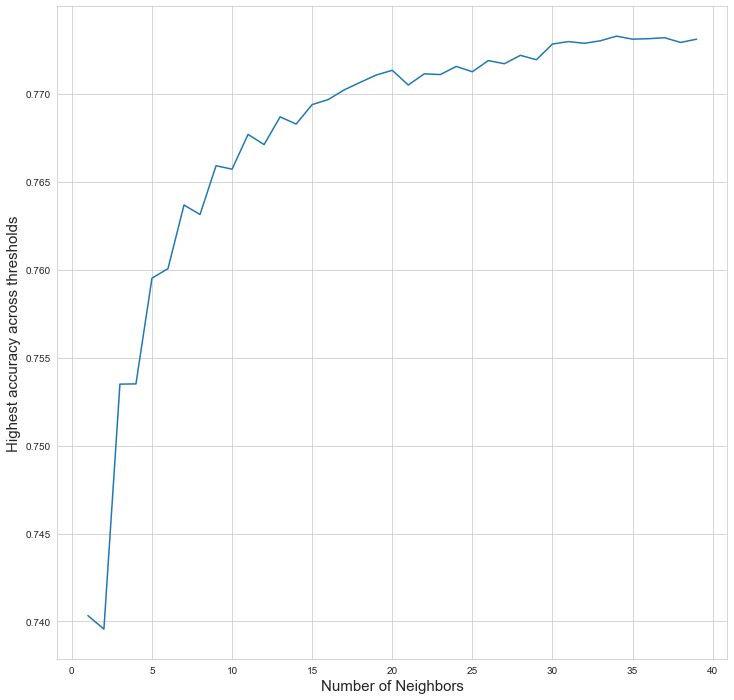

In [26]:
# Plotting accuracy against the number of neighbors chosen for the KNN model.
# Accuracy generally increases as the number of neigbors goes up.

plt.figure(figsize = (12,12))

plt.plot(np.arange(n1,n2,1),
            np.max(accs,axis=1))

plt.xlabel("Number of Neighbors", fontsize=15)
plt.ylabel("Highest accuracy across thresholds", fontsize=15)

----------------
Here's to training a basic Feed-Forward Neural Network.
----

In [27]:
import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [28]:
model = models.Sequential()

Metal device set to: Apple M1


2022-06-03 15:23:08.909163: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-03 15:23:08.909370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In the following architecture, we experimented with having more layers with less nodes versus having fewer layers with more nodes. Performances were roughly similar, but adding more layers to the network provided a slight performance boost when compared to adding more nodes to each layer.

In [29]:
# Again, the list of features we decided to train the model on
feature_model2 = ['name sim', 'address sim', 'city sim', 'state sim', 
                 'zip sim', 'country sim', 'url sim', 'phone sim', 
                 'categories sim', 'distance']

model.add(layers.Dense(512, activation='relu', input_shape=np.shape(pair_train[feature_model2].values[0])) )

# we then add a second layer that is 16 nodes tall
# and uses the relu activation function
# note we don't need the input shape here, 
# it is inferred from the first layer's output
model.add(layers.Dense(256, activation='relu') )

model.add(layers.Dense(128, activation='relu') )

model.add(layers.Dense(64, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(32, activation='relu') )

model.add(layers.Dense(16, activation='relu') )

model.add(layers.Dense(8, activation='relu') )

model.add(layers.Dense(4, activation='relu') )


# finally we add the output layer
# this will have a single node, representing a probability
# that the observation has positive sentiment
# this is why the activation is a softmax
# for more information on the softmax see the Practice Problems
model.add(layers.Dense(2, activation='softmax') )

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [31]:
model.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [32]:
n_epochs = 40
batch_size = 1000
history = model.fit(pair_train[feature_model2].values, to_categorical(pair_train['match'].values),
                   epochs=n_epochs,
                   batch_size=batch_size,
                   validation_data=(pair_test[feature_model2].values, to_categorical(pair_test['match'].values)))

Epoch 1/40


2022-06-03 15:23:23.440563: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-03 15:23:24.076993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 0.5411 - accuracy: 0.7436

2022-06-03 15:23:32.698506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 10s 21ms/step - loss: 0.5411 - accuracy: 0.7436 - val_loss: 0.5198 - val_accuracy: 0.7592
Epoch 2/40
435/435 [==============================] - 9s 21ms/step - loss: 0.5070 - accuracy: 0.7609 - val_loss: 0.4953 - val_accuracy: 0.7641
Epoch 3/40
435/435 [==============================] - 9s 21ms/step - loss: 0.4923 - accuracy: 0.7684 - val_loss: 0.5019 - val_accuracy: 0.7544
Epoch 4/40
435/435 [==============================] - 9s 21ms/step - loss: 0.4859 - accuracy: 0.7705 - val_loss: 0.4991 - val_accuracy: 0.7601
Epoch 5/40
435/435 [==============================] - 9s 21ms/step - loss: 0.4825 - accuracy: 0.7723 - val_loss: 0.5018 - val_accuracy: 0.7705
Epoch 6/40
435/435 [==============================] - 9s 21ms/step - loss: 0.4790 - accuracy: 0.7731 - val_loss: 0.4796 - val_accuracy: 0.7713
Epoch 7/40
435/435 [==============================] - 10s 23ms/step - loss: 0.4769 - accuracy: 0.7740 - val_loss: 0.4756 - val_accuracy: 0.7747
Epoch 8/

In [33]:
NN_pred = model.predict(pair_test[feature_model2].values)

  40/4523 [..............................] - ETA: 11s

2022-06-03 15:29:31.504740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4523/4523 [==============================] - 11s 2ms/step


In [34]:
NN_pred
NN_hard_pred = np.where(NN_pred[:,1] > 0.5, 1, 0)

print("The accuracy is ", accuracy_score(NN_hard_pred,pair_test['match'].values))
print("The precision is ", precision_score(NN_hard_pred,pair_test['match'].values))
print("The recall is ",  recall_score(NN_hard_pred,pair_test['match'].values))

The accuracy is  0.7783343812833818
The precision is  0.8849714635345096
The recall is  0.8106153874423476


-----
Finally, let's train XGBoost on the data
-------
We have two models. In the first, we train using the `train_data` above. In the second, we throw away the matches in `pairs_data` which is log high distances. This is because the provided data is erroneous and we suspect that observations which are far from each other should not be logged as a `match`.

In [35]:
import xgboost

In [36]:
feature_model3 = ['name sim', 'address sim', 'city sim', 'state sim', 
                 'zip sim', 'country sim', 'url sim', 'phone sim', 
                 'categories sim', 'distance']

## Let's recreate our learning_rate comparison

### Create an XGBRegressor object
### learning_rate=.1, max_depth=1, n_estimators=10
xgb_reg1 = xgboost.XGBRegressor(learning_rate=.5,
                                   max_depth=5,
                                   n_estimators=200)


## fit it
xgb_reg1.fit(pair_train[feature_model3], pair_train['match'],
             eval_set=[(pair_test[feature_model3], pair_test['match'])] )

[0]	validation_0-rmse:0.43043
[1]	validation_0-rmse:0.40811
[2]	validation_0-rmse:0.40085
[3]	validation_0-rmse:0.39809
[4]	validation_0-rmse:0.39609
[5]	validation_0-rmse:0.39458
[6]	validation_0-rmse:0.39389
[7]	validation_0-rmse:0.39353
[8]	validation_0-rmse:0.39279
[9]	validation_0-rmse:0.39214
[10]	validation_0-rmse:0.39178
[11]	validation_0-rmse:0.39139
[12]	validation_0-rmse:0.39120
[13]	validation_0-rmse:0.39090
[14]	validation_0-rmse:0.39056
[15]	validation_0-rmse:0.39045
[16]	validation_0-rmse:0.39015
[17]	validation_0-rmse:0.38997
[18]	validation_0-rmse:0.38987
[19]	validation_0-rmse:0.38977
[20]	validation_0-rmse:0.38970
[21]	validation_0-rmse:0.38962
[22]	validation_0-rmse:0.38937
[23]	validation_0-rmse:0.38931
[24]	validation_0-rmse:0.38907
[25]	validation_0-rmse:0.38899
[26]	validation_0-rmse:0.38894
[27]	validation_0-rmse:0.38876
[28]	validation_0-rmse:0.38873
[29]	validation_0-rmse:0.38869
[30]	validation_0-rmse:0.38870
[31]	validation_0-rmse:0.38862
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
xgb_pred = np.where(xgb_reg1.predict(pair_test[feature_model3]) > 0.5, 1, 0)
print("The accuracy is ", accuracy_score(xgb_pred,pair_test['match'].values))
print("The precision is ", precision_score(xgb_pred,pair_test['match'].values))
print("The recall is ",  recall_score(xgb_pred,pair_test['match'].values))


The accuracy is  0.7844355234337753
The precision is  0.8988134046159865
The recall is  0.8093371508051915


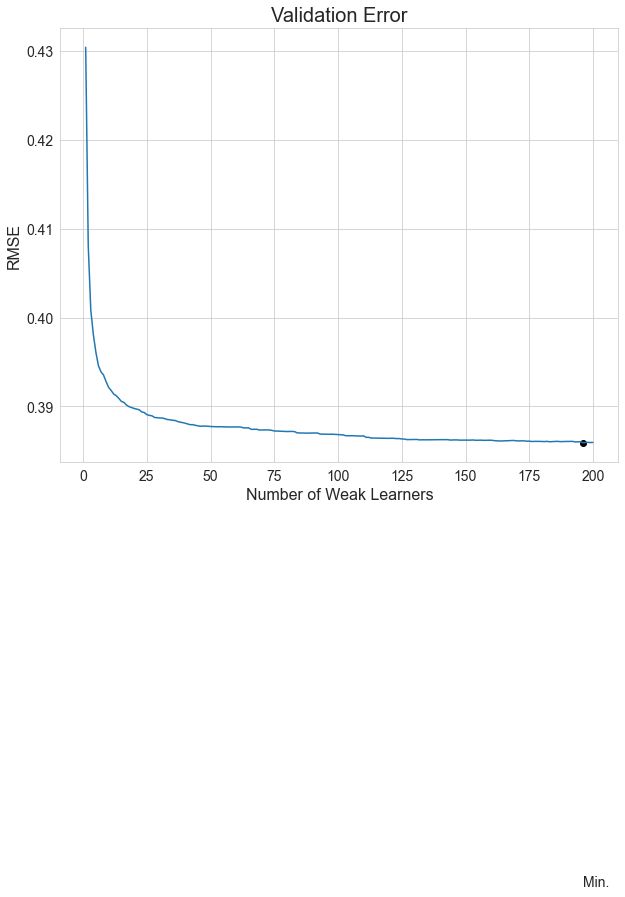

In [38]:
plt.figure(figsize=(10,8))

plt.plot(range(1,len(xgb_reg1.evals_result()['validation_0']['rmse'])+1), 
         xgb_reg1.evals_result()['validation_0']['rmse'])
plt.scatter([range(1,len(xgb_reg1.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg1.evals_result()['validation_0']['rmse'])]], 
            [np.min(xgb_reg1.evals_result()['validation_0']['rmse'])], c='k')
plt.text(range(1,len(xgb_reg1.evals_result()['validation_0']['rmse'])+1)[np.argmin(xgb_reg1.evals_result()['validation_0']['rmse'])], 
         np.min(xgb_reg1.evals_result()['validation_0']['rmse'])-.05, "Min.", fontsize=14)

plt.title("Validation Error", fontsize=20)
plt.xlabel("Number of Weak Learners", fontsize=16)
plt.ylabel("RMSE", fontsize=16)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()

In [39]:
xgb_reg1.save_model('xgbmodel.json')

Here are some tests pertaining to further data-cleaining in attempts to handle erroneous data. Our motivation is to implement the following idea. If two observations are recorded at distant locations, then they should not have the same point of interest, regardless of whether they are an official `match` accoring to the dataset. This could be cause of error, so we will throw away matching pairs from the `pair_data` for which the two observations are far apart.

In [40]:
pre_clean_train, clean_test = train_test_split(pair_data_vectorized.copy(),
                                         shuffle=True,
                                         random_state=609,
                                         stratify=pair_data_vectorized['match'])

pre_clean_train['match'] = pre_clean_train['match'].astype(bool)

Q = pre_clean_train.distance[pre_clean_train['match']].quantile(0.95)
indices = pre_clean_train[pre_clean_train['match']][pre_clean_train['distance']>=Q].index
clean_train = pre_clean_train.copy()
clean_train.drop(indices,inplace=True)

pre_clean_train['match'] = pre_clean_train['match'].astype(int)
clean_train['match'] = clean_train['match'].astype(int)

/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_74505/4048447523.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = pre_clean_train[pre_clean_train['match']][pre_clean_train['distance']>=Q].index


In [41]:
# Train on clean data, evaluate on dirty data

xgb_reg2 = xgboost.XGBRegressor(learning_rate=0.5,
                                   max_depth=5,
                                   n_estimators=200)

## fit it
xgb_reg2.fit(clean_train[feature_model3], clean_train['match'],
             eval_set=[(clean_test[feature_model3], clean_test['match'])] )

[0]	validation_0-rmse:0.44405
[1]	validation_0-rmse:0.42918
[2]	validation_0-rmse:0.42725
[3]	validation_0-rmse:0.42494
[4]	validation_0-rmse:0.42641
[5]	validation_0-rmse:0.42891
[6]	validation_0-rmse:0.42764
[7]	validation_0-rmse:0.42627
[8]	validation_0-rmse:0.42569
[9]	validation_0-rmse:0.42552
[10]	validation_0-rmse:0.42482
[11]	validation_0-rmse:0.42686
[12]	validation_0-rmse:0.42659
[13]	validation_0-rmse:0.42626
[14]	validation_0-rmse:0.42593
[15]	validation_0-rmse:0.42577
[16]	validation_0-rmse:0.42576
[17]	validation_0-rmse:0.42581
[18]	validation_0-rmse:0.42571
[19]	validation_0-rmse:0.42556
[20]	validation_0-rmse:0.42534
[21]	validation_0-rmse:0.42524
[22]	validation_0-rmse:0.42533
[23]	validation_0-rmse:0.42532
[24]	validation_0-rmse:0.42517
[25]	validation_0-rmse:0.42505
[26]	validation_0-rmse:0.42503
[27]	validation_0-rmse:0.42503
[28]	validation_0-rmse:0.42500
[29]	validation_0-rmse:0.42494
[30]	validation_0-rmse:0.42487
[31]	validation_0-rmse:0.42480
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [42]:
accuracy_score(np.where(xgb_reg2.predict(clean_test[feature_model3]) > 0.5, 1, 0), clean_test['match'].values)

0.7545102157855825

As we see, it does not look to be in our benefit to throw away any data in the above way.

Finally, we perform a simple examination of false positives and false negatives. Remember that the precision and recall scores for our model are as below:

In [43]:
print("The precision is ", precision_score(xgb_pred,pair_test['match'].values))
print("The recall is ",  recall_score(xgb_pred,pair_test['match'].values))

The precision is  0.8988134046159865
The recall is  0.8093371508051915


Here is a raw count for the number of misses our classifier has. That is, out of 144727 pairs in `pair_test`, our `xgb_reg1` classifier misclassified 31198 points.

In [44]:
np.sum(np.abs(xgb_pred - pair_test['match'].values))

31198

In the following array, `0` entries correspond to correctly classified pairs whereas `1` is a false positive (the pair is not a match but our classifier predicted a match) and `-1` is a false negative (the pair is a match but our classifier missed it).

In [45]:
mismatch = xgb_pred - pair_test['match'].values

In [46]:
false_negative_indices = np.argwhere(mismatch < 0).reshape(10088,).tolist()
false_positive_indices = np.argwhere(mismatch > 0).reshape(21110,).tolist()

In [53]:
feature_pairs = ['name_1','name_2','longitude_1','longitude_2','latitude_1','latitude_2',
                    'address_1','address_2','city_1','city_2','country_1','country_2',
                    'zip_1','zip_2','phone_1','phone_2','url_1','url_2','categories_1','categories_2']

feature_pairs_1 = ['id_1','id_2','name_1','name_2','address_1','address_2',
                    'zip_1','zip_2','phone_1','phone_2','url_1','url_2','categories_1','categories_2','distance']

This first table lists the data of pairs which are false negatives from our model. That is, this table is a list of pairs which have the same point of interest, but our model predicts them to have different points of interest. Some key notes are that many of the `(name_1,name_2)` and `(categories_1,categories_2)` pairs have an evident association which is not observed by our methods. For example, the TfIdf text processing we did cannot observe that something like `General Travel` can be associated with `Baggage Claim`.

In [54]:
pair_test.iloc[false_negative_indices][feature_pairs_1].head(50)

,id_1,id_2,name_1,name_2,address_1,address_2,zip_1,zip_2,phone_1,phone_2,url_1,url_2,categories_1,categories_2,distance
308408,E_882d20843ee587,E_67b361ac6e3908,ココス,ココス 茂原八千代店,八千代3-2-3,NaN,297-0024,297-0024,0475201108,NaN,https://www.cocos-jpn.co.jp,NaN,Japanese Family Restaurants,Restaurants,0.038025
392414,E_ad33a4f960822d,E_2dc970a9b3d6da,Dongjing Road Metro Station (东靖路地铁站),Dongjing Road Metro Station (东靖路地铁站),"Zhangyang Rd, Dongjing Rd | 张扬路, 东靖路",张杨北路东靖路,NaN,NaN,+862164370000,+862164370000,http://service.shmetro.com/en/yxxlt/index.htm,http://service.shmetro.com/en/yxxlt/index.htm,Metro Stations,Metro Stations,0.469612
89302,E_277b13d5259979,E_470cc0ece3feb5,Baggage Claim,Baggage Claim 20,"Main Terminal, Level 2",NaN,32827,NaN,NaN,NaN,http://www.orlandoairports.net/arrive/,NaN,Baggage Claims,Airport Terminals,0.219000
178586,E_4ed10bfde61d7c,E_3fb871805fbb60,Mancuso's Italian Restaurant,Mancuso's Italian Restaurant,405 S Main St,230 Oak St,18518,NaN,4057624678,5704574335,NaN,NaN,Italian Restaurants,Pizza Places,0.394327
504487,E_ded8d4fbce7ee3,E_5d8170afad0ced,Lindenwald,Lindenwald Park,400 Fairview Ave,NaN,45015,NaN,NaN,NaN,NaN,NaN,"Other Great Outdoors, Pizza Places, Dog Runs",Playgrounds,0.186254
268403,E_763b9af19dba10,E_860fb860281452,Kediri Mall,Sri Ratu,Jl. Hayam Wuruk No. 46,NaN,64122,NaN,354694200,NaN,NaN,NaN,Shopping Malls,Movie Theaters,0.641395
487606,E_d75461649e3ce3,E_abf1d918109837,Safeway,Safeway Deli,470 N Santa Cruz Ave,470 N Santa Cruz Ave,95030,95030,+14083549708,NaN,https://local.safeway.com/safeway/ca/los-gatos...,NaN,"Grocery Stores, Supermarkets, Liquor Stores",Delis / Bodegas,0.012060
398046,E_af9b8436af28bc,E_8a527595982dac,AT&T,Attitude's,701 Market St,83 1st St,94103,94105,4152811205,+14153924131,http://att.com,NaN,Mobile Phone Shops,NaN,0.605365
107877,E_2f95eae4500b87,E_77fa63f74588ce,Озеро Лебяжье,Глебяжье озеро,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lakes,Rest Areas,0.265611
301108,E_84f83535494253,E_90877556d6d1aa,II hirurška klinika | Klinika za vaskularnu hi...,УДРУЖЕЊЕ КЊИЖЕВНИКА СРБИЈЕ,Dr Koste Todorovića 8c,Француска 7,11040,NaN,+381113065176,NaN,http://www.kcs.ac.rs/index.php/klinike/klinika...,NaN,Hospitals,College Academic Buildings,2.026039


In [49]:
ids = 'E_055c9949869d8a'
poi = data[data['id'] == ids]['point_of_interest'].values[0]
data[(data['point_of_interest'] == poi)]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
23898,E_055c9949869d8a,Frontier Baggage Claim,37.614955,-122.384861,NaN,San Francisco,CA,NaN,US,NaN,NaN,General Travel,P_7ec26b3743da93
837324,E_bc0a06cef2aa9f,Terminal 1 Baggage Claim,37.614645,-122.385662,Harvey Milk Terminal 1,San Francisco,CA,94128,US,NaN,NaN,Baggage Claims,P_7ec26b3743da93


This first table lists the data of pairs which are false positives from our model. That is, this table is a list of pairs which have different points of interest, but our model predicts them to have the same points of interest. We take note that a lot of these pairs have incredibly similar data throughout, except for small differences in names, addresses, or other features. For example, entry `498103` is a pair of university classrooms. One is room 005 while another is room 105. In order to identify these differences, we may need to introduce a procedure to identify small (eg., numerical) features within the names.

In [50]:
pair_test.iloc[false_positive_indices][feature_pairs_1]

,id_1,id_2,name_1,name_2,address_1,address_2,zip_1,zip_2,phone_1,phone_2,url_1,url_2,categories_1,categories_2
330043,E_91dca4b5970566,E_452b54ecda7780,Кроватка^^,Кроватка Лукашик😴,Ул. Заслонова,Ул Заслонова 12,NaN,NaN,NaN,NaN,NaN,NaN,Resorts,Resorts
319371,E_8d1ab99cf6d7e4,E_f82cbb0e4447d1,Cleaners,Clarks,NaN,5364 Kings Plaza Space 1730,11234,11234,NaN,+17183382841,NaN,https://www.clarksusa.com,NaN,Shoe Stores
498103,E_dbfcbfbbe6eaa8,E_82d084b38e0ac7,Sala 005 - Iscap,Sala 105 - Iscap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College Classrooms,College Classrooms
77851,E_22634dc2082150,E_d7d53cd3aa3804,SEPHORA,SEPHORA inside JCPenney,1 Towne Centre Blvd #2800,1 Towne Centre Blvd,22407,22407,5405483366,NaN,https://www.sephora.com/happening/stores/frede...,NaN,Cosmetics Shops,Cosmetics Shops
572791,E_fd4f4526070c76,E_fecb91c67fb318,Mann Center for the Performing Arts,Mann Center for the Performing Arts D Gate,5201 Parkside Ave,5201 Parkside Ave,19131,19131,2155467900,NaN,http://www.manncenter.org,NaN,"Performing Arts Venues, Music Venues, Outdoor ...",Performing Arts Venues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430718,E_bdc00e2c45904e,E_f9bd349e2e7246,Restaurante Burgo,Restaurante Buxa,NaN,Largo Oliveira,NaN,4800-862,NaN,+351911175763,NaN,NaN,Fast Food Restaurants,Restaurants
391824,E_acf483006c414c,E_c366bb04e52931,El Artesano de Telde,Coffee Telde,NaN,"Calle Matías Zurita, 15",NaN,35200,NaN,NaN,NaN,NaN,Coffee Shops,Coffee Shops
326279,E_90352dbfe0f58f,E_3f575f11e550e0,Block H016,Block H012,University Tunku Abdul Rahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College Classrooms
274055,E_78b1107e5126bb,E_a911897507b594,Posto Americano III,Futebol Da Quinta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Convenience Stores,Soccer Stadiums


In [51]:
ids = pair_test.loc[572791][['id_1','id_2']].values.tolist()
data[data['id'].isin(ids)]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
1126881,E_fd4f4526070c76,Mann Center for the Performing Arts,39.983467,-75.221849,5201 Parkside Ave,Philadelphia,PA,19131,US,http://www.manncenter.org,2155467900,"Performing Arts Venues, Music Venues, Outdoor ...",P_6f0f7249e54870
1133544,E_fecb91c67fb318,Mann Center for the Performing Arts D Gate,39.983558,-75.223507,5201 Parkside Ave,Philadelphia,PA,19131,US,NaN,NaN,Performing Arts Venues,P_70d53bfea1ff14
